## Observations and Insights
The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens.
>- The gender of the mice is very uniform and almost identical along with the amount of mice per drug regimen is similar.
>- The scatter plot demonstrates for Capomulin that the mouse weight and tumor volume possitively correlated and the tumor volume was larger for larger mice.
>- The line plot demonstrates that Capomulin decreases the tumor volume over time.
>- Capomulin is as effective as the most effective drug at reducing tumors as shown in the boxplot and summary statistics table where the tumor volume mean and median are almost as low as the lowest median and mean, Ramicane.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
data_df = mouse_metadata.merge(study_results,on="Mouse ID", how = "outer")
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
data_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_group = clean_mouse.groupby("Drug Regimen")
Tumor_vol = drug_group["Tumor Volume (mm3)"]
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = round(Tumor_vol.mean(),2)
drug_median = round(Tumor_vol.median(),2)
drug_var = round(Tumor_vol.var(),2)
drug_std = round(Tumor_vol.std(),2)
drug_SEM = round(Tumor_vol.sem(),2)
# Assemble the resulting series into a single summary dataframe.
drug_sumdf = pd.DataFrame({"Mean":drug_mean,
                            "Median":drug_median,
                            "Variance":drug_var,
                            "Standard Deviation":drug_std,
                            "SEM":drug_SEM})
print(drug_sumdf)



               Mean  Median  Variance  Standard Deviation   SEM
Drug Regimen                                                   
Capomulin     40.68   41.56     24.95                4.99  0.33
Ceftamin      52.59   51.78     39.29                6.27  0.47
Infubinol     52.88   51.82     43.13                6.57  0.49
Ketapril      55.24   53.70     68.55                8.28  0.60
Naftisol      54.33   52.51     66.17                8.13  0.60
Placebo       54.03   52.29     61.17                7.82  0.58
Propriva      52.39   50.91     43.14                6.57  0.53
Ramicane      40.22   40.67     23.49                4.85  0.32
Stelasyn      54.23   52.43     59.45                7.71  0.57
Zoniferol     53.24   51.82     48.53                6.97  0.52


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice')

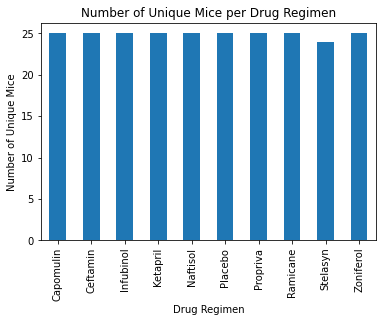

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
unique_mice = drug_group["Mouse ID"].nunique()
ax = unique_mice.plot(kind="bar", title = "Number of Unique Mice per Drug Regimen")
ax.set_ylabel("Number of Unique Mice")

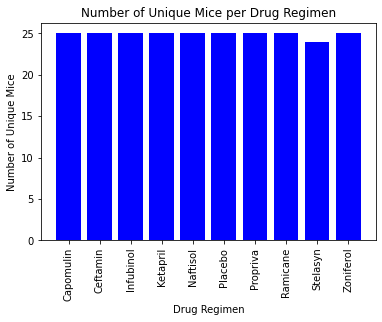

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = unique_mice.keys()
plt.bar(x_axis, unique_mice, color='b')
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")
plt.title("Number of Unique Mice per Drug Regimen")
plt.show()


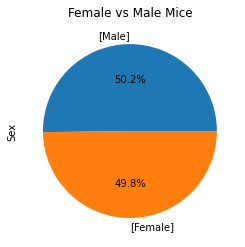

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseID_group = clean_mouse.groupby("Mouse ID")
unique_mouse_gender = mouseID_group["Sex"].unique()
unique_mouse_gender = unique_mouse_gender.value_counts()
unique_mouse_gender.plot(kind="pie", autopct="%1.1f%%", title="Female vs Male Mice")


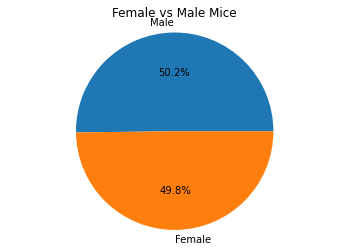

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(unique_mouse_gender, labels = ["Male", "Female"], autopct="%1.1f%%")
plt.title("Female vs Male Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_time_max = mouseID_group["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_maxtime = clean_mouse.merge(mouse_time_max, how = "outer", on = "Mouse ID",suffixes = (None, ' Max'))
merge_maxtime.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint Max
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the final tumor volumes
#Capomulin
cap = merge_maxtime.loc[(merge_maxtime["Drug Regimen"] == "Capomulin") & (merge_maxtime["Timepoint"] == merge_maxtime["Timepoint Max"]),"Tumor Volume (mm3)"]

#Ramicane
ram = merge_maxtime.loc[(merge_maxtime["Drug Regimen"] == "Ramicane") & (merge_maxtime["Timepoint"] == merge_maxtime["Timepoint Max"]),"Tumor Volume (mm3)"]

#Infubinol
inf = merge_maxtime.loc[(merge_maxtime["Drug Regimen"] == "Infubinol") & (merge_maxtime["Timepoint"] == merge_maxtime["Timepoint Max"]),"Tumor Volume (mm3)"]

#Ceftamin
cef = merge_maxtime.loc[(merge_maxtime["Drug Regimen"] == "Ceftamin") & (merge_maxtime["Timepoint"] == merge_maxtime["Timepoint Max"]),"Tumor Volume (mm3)"]

# Determine outliers using upper and lower bounds
#Capomulin
quartiles = cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
cap_outlier = cap.loc[(cap < lower_bound) \
                               | (cap > upper_bound)]
print(f"Potential Outliers for Capomulin are {cap_outlier}")

#Ramicane
quartiles = ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
ram_outlier = ram.loc[(ram < lower_bound) \
                               | (ram > upper_bound)]
print(f"Potential Outliers for Ramicane are {ram_outlier}")

#Infubinol
quartiles = inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
inf_outlier = inf.loc[(inf < lower_bound) \
                               | (inf > upper_bound)]
print(f"Potential Outliers for Infubinol are {inf_outlier}")

#Ceftamin
quartiles = cef.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
cef_outlier = cef.loc[(cef < lower_bound) \
                               | (cef > upper_bound)]
print(f"Potential Outliers for Ceftamin are {cef_outlier}")

Potential Outliers for Capomulin are Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential Outliers for Ramicane are Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential Outliers for Infubinol are 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential Outliers for Ceftamin are Series([], Name: Tumor Volume (mm3), dtype: float64)


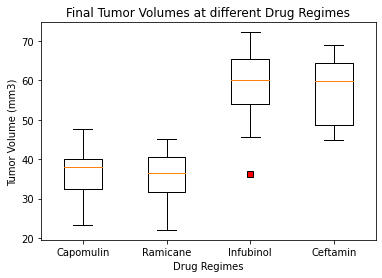

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes at different Drug Regimes')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimes")
red_square = dict(markerfacecolor='r', marker='s')
ax1.boxplot([cap, ram, inf, cef], labels = treatments, flierprops=red_square)
plt.show()

## Line and Scatter Plots

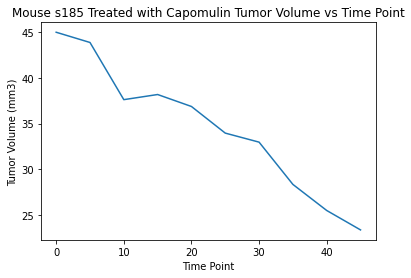

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_mouse = merge_maxtime.loc[(merge_maxtime["Mouse ID"] == "s185"), "Timepoint":"Tumor Volume (mm3)"]
x_axis = s185_mouse["Timepoint"]
y_axis = s185_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Mouse s185 Treated with Capomulin Tumor Volume vs Time Point")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

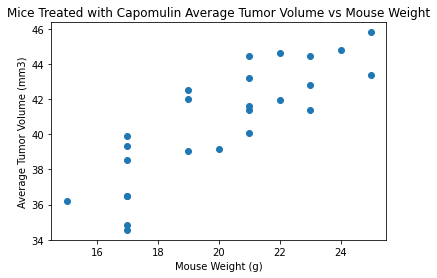

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_scatter = merge_maxtime.loc[(merge_maxtime["Drug Regimen"] == "Capomulin")]
cap_group = cap_scatter.groupby("Mouse ID")
avg_tumor = cap_group["Tumor Volume (mm3)"].mean()
mouse_weight = cap_group["Weight (g)"].unique()
mouse_weight = mouse_weight.astype(int).tolist()
plt.scatter(mouse_weight, avg_tumor)
plt.title("Mice Treated with Capomulin Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The r-value between both factors is 0.84 and the r^2 value is 0.71


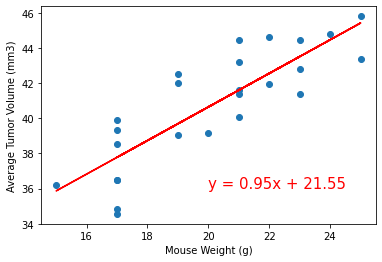

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor)
print(f"The r-value between both factors is {round(rvalue,2)} and the r^2 value is {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in mouse_weight]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor)
plt.plot(mouse_weight, regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()